# Neural Network with Backpropagation from Scratch for Iris dataset
**[For theory, click here.](1_scratch_fake.ipynb)**

## Load Data

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Neural Network

In [7]:
class Neuron:
    def __init__(self, weights):
        self.weights = weights
        self.output = None
        self.delta = None

In [8]:
from random import seed, random

In [9]:
def initialize_network(n_input, n_hidden, n_output):
    seed(101)
    network = []
    network.append([Neuron([random() for _ in range(n_input+1)]) for _ in range(n_hidden)])
    network.append([Neuron([random() for _ in range(n_hidden+1)]) for _ in range(n_output)])
    return network

In [10]:
def activate(neuron, inputs):
    weights = neuron.weights
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i]*inputs[i]
    return activation

In [11]:
from math import exp
def transfer(activation):
    return 1/(1+exp(-activation))

In [12]:
def forward_propagate(network, inputs):
    for layer in network:
        new_inputs=[]
        for neuron in layer:
            activation = activate(neuron, inputs)
            output = transfer(activation)
            neuron.output = output
            new_inputs.append(output)
        inputs = new_inputs
    return inputs

In [13]:
def transfer_derivative(output):
    return output*(1-output)

In [14]:
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []
        if i == len(network)-1:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j]-neuron.output)
        else:
            for j in range(len(layer)):
                error = 0
                for neuron in network[i+1]:
                    error += neuron.weights[j]*neuron.delta
                errors.append(error)
        for j in range(len(layer)):
            neuron = layer[j]
            neuron.delta = errors[j]*transfer_derivative(neuron.output)

In [15]:
def update_weights(network, x, l_rate):
    for i in range(len(network)):
        inputs = x
        if i != 0:
            inputs = [neuron.output for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron.weights[j] += l_rate*neuron.delta*inputs[j]
            neuron.weights[-1] += l_rate*neuron.delta

In [16]:
def fit(network, X, y, l_rate, n_epoch, n_output):
    errors = []
    for epoch in range(n_epoch):
        sum_error = 0
        for i in range(len(X)):
            outputs = forward_propagate(network, X[i])
            expected = [0 for _ in range(n_output)]
            expected[y[i]] = 1
            sum_error += sum((expected[i]-outputs[i])**2 for i in range(n_output))
            backward_propagate_error(network,expected)
            update_weights(network, X[i], l_rate)
        errors.append(sum_error)
        print('epoch=%2d => error=%.3f' % (epoch+1, sum_error))
    return errors

In [17]:
n_inputs = len(X_train[0])
n_outputs = len(set(y_train))
n_epoch = 100
l_rate = 0.3
network = initialize_network(n_inputs, 8, n_outputs)
errors = fit(network, X_train, y_train, l_rate, n_epoch, n_outputs)

epoch= 1 => error=137.350
epoch= 2 => error=73.188
epoch= 3 => error=51.727
epoch= 4 => error=41.574
epoch= 5 => error=37.373
epoch= 6 => error=35.295
epoch= 7 => error=33.862
epoch= 8 => error=32.639
epoch= 9 => error=31.534
epoch=10 => error=30.465
epoch=11 => error=29.303
epoch=12 => error=28.051
epoch=13 => error=26.736
epoch=14 => error=25.326
epoch=15 => error=23.779
epoch=16 => error=22.092
epoch=17 => error=20.384
epoch=18 => error=19.120
epoch=19 => error=17.921
epoch=20 => error=17.357
epoch=21 => error=17.117
epoch=22 => error=17.547
epoch=23 => error=17.061
epoch=24 => error=17.121
epoch=25 => error=16.538
epoch=26 => error=16.403
epoch=27 => error=15.476
epoch=28 => error=18.643
epoch=29 => error=15.391
epoch=30 => error=15.240
epoch=31 => error=13.685
epoch=32 => error=16.486
epoch=33 => error=19.241
epoch=34 => error=10.366
epoch=35 => error=11.784
epoch=36 => error=11.093
epoch=37 => error=11.627
epoch=38 => error=12.233
epoch=39 => error=17.935
epoch=40 => error=14.765

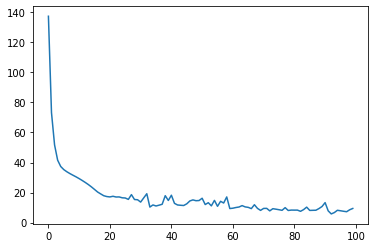

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(n_epoch), errors)

## Make Prediction

In [19]:
def predict_one(network, x):
    outputs = forward_propagate(network, x)
    return outputs.index(max(outputs))

In [20]:
pred = [predict_one(network, x) for x in X_test]

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15  0  0]
 [ 0 22  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## PERFECT!